### Basics of Open CV

[Open CV]('https://www.geeksforgeeks.org/opencv-python-tutorial/')<br>
[Editing Pictures]('https://heartbeat.fritz.ai/opencv-python-cheat-sheet-from-importing-images-to-face-detection-52919da36433#80fd')

In [1]:
#Importing the package
import cv2

In [3]:
#Upload a random image
img = cv2.imread(r"C:\Users\asharma\Desktop\Zoom_BG6_City-Office.jpg",0)

#-1 = Color and transperency
#0 = Black and White
#1 = Color

In [4]:
# How is the image data stored ?

print(type(img))

#Stroed in numpy array with range of numbers depending on how light or dark the color on the pixels are

<class 'numpy.ndarray'>


In [5]:
print(img) #here is the array

[[ 91  92  94 ...  59  59  60]
 [ 91  91  93 ...  59  60  60]
 [ 93  91  91 ...  60  60  60]
 ...
 [101 104 102 ... 215 212 209]
 [101 103 101 ... 230 230 231]
 [ 92  90  88 ... 227 227 229]]


In [7]:
print(img.shape) #This is an HD pic as it has 1080 by 1920 pixel
print(img.ndim)

(1080, 1920)
2


In [8]:
#How to view the image of the pic

cv2.imshow("Pic_of_office",img)
cv2.waitKey(0) #if it is 0 than the window will close as soon as you press the button
                #else any number you put it will wait for that many milli seconds
cv2.destroyAllWindows() #This closes the windows

In [9]:
#Resizing the image 
#How zoom out works!

resized_img = cv2.resize(img,(1080,780)) #Image resizing

cv2.imshow("Resized_pic_of_office",resized_img)  #Naming the window and the inserting the resized image
cv2.waitKey(0) #if it is 0 than the window will close as soon as you press the button
                #else any number you put it will wait for that many milli seconds
cv2.destroyAllWindows() #This closes the windows

In [10]:
#Auto Resizing the image
#How Zoom in works!

resized_img = cv2.resize(img,(round(img.shape[1]*2),round(img.shape[0]*2))) #Image resizing

cv2.imshow("Resized_pic_of_office",resized_img)  #Naming the window and the inserting the resized image
cv2.waitKey(0) #if it is 0 than the window will close as soon as you press the button
                #else any number you put it will wait for that many milli seconds
cv2.destroyAllWindows() #This closes the windows

In [12]:
# Writing a resized image
resized_img = cv2.resize(img,(1080,780)) #Image resizing

cv2.imshow("Resized_pic_of_office",resized_img) #Naming the window and the inserting the resized image
cv2.imwrite(r"C:\Users\asharma\Desktop\Resized_pic_of_office.jpg",resized_img) #Writing the image

cv2.waitKey(0) #if it is 0 than the window will close as soon as you press the button
                #else any number you put it will wait for that many milli seconds
cv2.destroyAllWindows() #This closes the windows

In [13]:
#Converting color image to B&W image

img = cv2.imread(r"C:\Users\asharma\Downloads\Image_col.jpeg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow("Gray",gray_img)  #Naming the window and the inserting the resized image
cv2.waitKey(0) #if it is 0 than the window will close as soon as you press the button
                #else any number you put it will wait for that many milli seconds
cv2.destroyAllWindows() #This closes the windows

In [14]:
# Write a script that resizes all images in a directory to 100x100.

import os
import cv2
import glob


os.chdir(r"C:\Users\asharma\Desktop\HD_images") #change the directory 1st to the place where we have the files

images=glob.glob("*.jpg") #make a list of all the jpg files in the directory

for image in images:
    img = cv2.imread(image,0) #iterate through the image files
    re=cv2.resize(img,(100,100)) #resize the iterated files
    cv2.imshow("Hey",re) #name the window and give the size stored re
    cv2.waitKey(500) # let the window be there for 500 milli seconds
    cv2.destroyAllWindows() #close the window
    cv2.imwrite("resized_"+image,re) #rename and write the file to resize + name of the image

In [12]:
# Face Detection

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') #create an object thru saved faces

img = cv2.imread(r"C:\Users\asharma\Downloads\Image_col.jpeg") #B&W image would produce high accuracy
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray_img, scaleFactor= 1.05,
                                      minNeighbors = 5) #The smaller the scale
                                                            #factor after 1 the better 1.05 is 5% reduction

print(type(faces))
print(faces)

<class 'numpy.ndarray'>
[[140 267 567 567]]


In [13]:
# Lets see the croped form of the face

for x, y, w, h in faces:
    img = cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,0), 3)
    
cv2.imshow("Croped",img)  #Naming the window and the inserting the resized image
cv2.waitKey(0) #if it is 0 than the window will close as soon as you press the button
                #else any number you put it will wait for that many milli seconds
cv2.destroyAllWindows() #This closes the windows

In [14]:
# Processing Videos in Python

import cv2
import time

#video = cv2.VideoCapture(0) #Captures from the 1st webcam
#video = cv2.VideoCapture(1) #Captures from the 2nd external camera
#video = cv2.VideoCapture('some_movie.mp4') #Captures from the video file

video = cv2.VideoCapture(0) #starts recording the video
a = 0

while True:
    a = a+1
    check, frame = video.read() #check will check if you are able to record, frame will record the videos
    print(check)
    print(frame)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # converts the video pictures into black and white    
    cv2.imshow("Capturing", gray) #displays the gray image
    
    key = cv2.waitKey(1) #stops the process at any press of button
    
    if key == ord('q'):
        video.release() #closes the video capture program
        cv2.destroyAllWindows #closes the program
        break
        
print(a) # will tell how long did the video play        

video.release() #closes the video capture program
cv2.destroyAllWindows() #closes the program

True
[[[203 219 194]
  [203 219 194]
  [203 219 194]
  ...
  [161 178 154]
  [161 178 154]
  [161 178 154]]

 [[203 219 194]
  [203 219 194]
  [203 219 194]
  ...
  [161 178 154]
  [161 178 154]
  [161 178 154]]

 [[203 219 194]
  [203 219 194]
  [203 219 194]
  ...
  [161 178 154]
  [161 178 154]
  [161 178 154]]

 ...

 [[255 255 238]
  [255 255 238]
  [255 255 238]
  ...
  [161 173 151]
  [161 173 151]
  [161 173 151]]

 [[255 255 238]
  [255 255 238]
  [255 255 238]
  ...
  [160 172 150]
  [161 173 151]
  [161 173 151]]

 [[255 255 238]
  [255 255 238]
  [255 255 238]
  ...
  [160 172 150]
  [160 172 150]
  [161 173 151]]]
True
[[[203 218 195]
  [203 218 195]
  [203 218 195]
  ...
  [163 178 160]
  [163 178 160]
  [163 178 160]]

 [[203 218 195]
  [203 218 195]
  [203 218 195]
  ...
  [163 178 160]
  [163 178 160]
  [163 178 160]]

 [[203 218 195]
  [203 218 195]
  [203 218 195]
  ...
  [163 178 160]
  [163 178 160]
  [163 178 160]]

 ...

 [[255 255 246]
  [255 255 246]
  [255 255

True
[[[136 143 142]
  [136 143 142]
  [137 144 143]
  ...
  [103 114 115]
  [103 114 115]
  [103 114 115]]

 [[136 143 142]
  [136 143 142]
  [137 144 143]
  ...
  [103 114 115]
  [104 115 116]
  [104 115 116]]

 [[136 143 142]
  [136 143 142]
  [137 144 143]
  ...
  [104 116 114]
  [104 115 116]
  [105 116 117]]

 ...

 [[182 187 186]
  [181 186 185]
  [181 186 185]
  ...
  [105 112 106]
  [105 112 106]
  [107 113 107]]

 [[186 186 186]
  [185 185 185]
  [183 185 185]
  ...
  [103 109 105]
  [104 110 107]
  [104 110 107]]

 [[186 186 186]
  [185 185 185]
  [183 185 185]
  ...
  [105 111 108]
  [105 111 108]
  [107 112 109]]]
True
[[[132 144 142]
  [132 144 142]
  [133 145 143]
  ...
  [101 116 111]
  [101 116 111]
  [101 116 111]]

 [[132 144 142]
  [132 144 142]
  [133 145 143]
  ...
  [101 116 111]
  [101 116 111]
  [101 116 111]]

 [[132 144 142]
  [132 144 142]
  [135 145 143]
  ...
  [103 116 111]
  [101 116 111]
  [101 116 111]]

 ...

 [[181 186 185]
  [181 186 185]
  [182 187

True
[[[128 136 132]
  [128 136 132]
  [127 135 131]
  ...
  [ 93 103 101]
  [ 92 102 100]
  [ 92 102 100]]

 [[127 135 131]
  [127 135 131]
  [127 135 131]
  ...
  [ 93 103 101]
  [ 92 102 100]
  [ 92 102 100]]

 [[127 135 131]
  [127 135 131]
  [127 135 131]
  ...
  [ 93 103 101]
  [ 93 103 101]
  [ 92 102 100]]

 ...

 [[169 174 173]
  [169 174 173]
  [169 174 173]
  ...
  [ 97  99  99]
  [ 97  99 101]
  [ 97  99 101]]

 [[168 173 172]
  [168 173 172]
  [169 174 173]
  ...
  [ 95 100  99]
  [ 97  99 101]
  [ 97  99 101]]

 [[168 173 172]
  [168 173 172]
  [169 174 173]
  ...
  [ 95 100  99]
  [ 97  99 101]
  [ 97  99 101]]]
True
[[[126 135 134]
  [125 134 133]
  [125 134 133]
  ...
  [ 95 102 101]
  [ 95 102 101]
  [ 95 102 101]]

 [[126 135 134]
  [125 134 133]
  [125 134 133]
  ...
  [ 95 102 101]
  [ 95 102 101]
  [ 95 102 101]]

 [[125 134 133]
  [125 134 133]
  [125 134 133]
  ...
  [ 97 102 101]
  [ 97 102 101]
  [ 97 102 101]]

 ...

 [[171 175 172]
  [171 175 172]
  [171 175

True
[[[129 133 133]
  [129 133 133]
  [128 133 130]
  ...
  [ 85  97  95]
  [ 87  99  97]
  [ 87  99  97]]

 [[129 133 133]
  [129 133 133]
  [128 133 130]
  ...
  [ 85  97  95]
  [ 85  97  95]
  [ 87  99  97]]

 [[127 134 133]
  [127 134 133]
  [125 134 130]
  ...
  [ 87  97  95]
  [ 87  97  95]
  [ 87  97  95]]

 ...

 [[171 174 173]
  [171 174 173]
  [171 174 173]
  ...
  [ 93 102  96]
  [ 94 103  97]
  [ 95 104  98]]

 [[171 174 173]
  [171 174 173]
  [169 174 173]
  ...
  [ 93 100  99]
  [ 92 102  99]
  [ 93 104 100]]

 [[171 174 173]
  [171 174 173]
  [169 174 173]
  ...
  [ 93 100  99]
  [ 92 102  99]
  [ 92 102  99]]]
True
[[[127 135 131]
  [127 135 131]
  [125 134 130]
  ...
  [ 83  98  95]
  [ 83  98  95]
  [ 83  98  95]]

 [[127 135 131]
  [127 135 131]
  [125 134 130]
  ...
  [ 83  98  95]
  [ 83  98  95]
  [ 83  98  95]]

 [[127 135 131]
  [127 135 131]
  [125 134 130]
  ...
  [ 87  97  95]
  [ 87  97  95]
  [ 87  97  95]]

 ...

 [[169 174 173]
  [169 174 173]
  [169 174

True
[[[119 131 129]
  [119 131 129]
  [119 131 129]
  ...
  [ 89 101  99]
  [ 89 101  99]
  [ 89 101  99]]

 [[119 131 129]
  [119 131 129]
  [119 131 129]
  ...
  [ 89 101  99]
  [ 89 101  99]
  [ 89 101  99]]

 [[123 130 129]
  [123 130 129]
  [123 130 129]
  ...
  [ 91 101  99]
  [ 92 102 100]
  [ 92 102 100]]

 ...

 [[170 173 172]
  [171 174 173]
  [169 174 173]
  ...
  [ 98  99  96]
  [100  98  96]
  [100  98  96]]

 [[165 170 169]
  [167 172 171]
  [169 174 173]
  ...
  [ 95  98  95]
  [ 98  99  96]
  [ 98  99  96]]

 [[161 166 165]
  [165 170 169]
  [169 174 173]
  ...
  [ 95  98  95]
  [ 97  97  95]
  [ 98  99  96]]]
True
[[[120 132 130]
  [120 132 130]
  [120 132 130]
  ...
  [ 90 102 100]
  [ 90 102 100]
  [ 90 102 100]]

 [[120 132 130]
  [120 132 130]
  [120 132 130]
  ...
  [ 90 102 100]
  [ 90 102 100]
  [ 90 102 100]]

 [[122 132 130]
  [122 132 130]
  [122 132 130]
  ...
  [ 92 102 100]
  [ 92 102 100]
  [ 92 102 100]]

 ...

 [[167 172 171]
  [167 172 171]
  [167 172

True
[[[124 137 131]
  [124 137 131]
  [124 137 131]
  ...
  [ 91  98  97]
  [ 91  98  97]
  [ 91  98  97]]

 [[124 137 131]
  [124 137 131]
  [124 137 131]
  ...
  [ 91  98  97]
  [ 91  98  97]
  [ 91  98  97]]

 [[123 135 131]
  [123 135 131]
  [125 135 131]
  ...
  [ 92  99  98]
  [ 92  99  98]
  [ 92  99  98]]

 ...

 [[ 78  85  91]
  [ 77  84  90]
  [ 77  84  90]
  ...
  [ 97  97  95]
  [ 98  99  95]
  [ 99 101  96]]

 [[ 77  86  87]
  [ 77  86  87]
  [ 76  85  85]
  ...
  [ 97  97  95]
  [ 98  99  95]
  [ 98  99  95]]

 [[ 76  85  85]
  [ 76  85  85]
  [ 75  83  84]
  ...
  [ 97  97  95]
  [ 97  98  93]
  [ 97  98  93]]]
True
[[[126 140 133]
  [126 140 133]
  [126 140 133]
  ...
  [ 91 100 101]
  [ 91 100 101]
  [ 91 100 101]]

 [[125 139 132]
  [125 139 132]
  [125 139 132]
  ...
  [ 91 100 101]
  [ 91 100 101]
  [ 91 100 101]]

 [[126 136 132]
  [127 137 133]
  [127 137 133]
  ...
  [ 93 100  99]
  [ 93 100  99]
  [ 93 100  99]]

 ...

 [[ 81  83  91]
  [ 81  83  91]
  [ 78  82

True
[[[131 143 141]
  [131 143 141]
  [131 143 141]
  ...
  [ 90 105 102]
  [ 92 106 104]
  [ 92 106 104]]

 [[131 143 141]
  [131 143 141]
  [131 143 141]
  ...
  [ 90 105 102]
  [ 92 106 104]
  [ 92 106 104]]

 [[133 142 141]
  [133 142 141]
  [133 142 141]
  ...
  [ 96 104 102]
  [ 98 105 104]
  [ 98 105 104]]

 ...

 [[ 87  94 102]
  [ 87  94 102]
  [ 89  95 103]
  ...
  [101 102 100]
  [101 102 100]
  [101 102 100]]

 [[ 86  93 101]
  [ 87  94 102]
  [ 87  94 102]
  ...
  [100 101  99]
  [100 101  99]
  [100 101  99]]

 [[ 86  93 101]
  [ 86  93 101]
  [ 87  94 102]
  ...
  [100 101  99]
  [100 101  99]
  [100 101  99]]]
True
[[[136 143 142]
  [136 143 142]
  [136 143 142]
  ...
  [ 94 106 102]
  [ 95 108 103]
  [ 95 108 103]]

 [[136 143 142]
  [136 143 142]
  [136 143 142]
  ...
  [ 94 106 102]
  [ 95 108 103]
  [ 95 108 103]]

 [[136 143 142]
  [136 143 142]
  [135 142 141]
  ...
  [ 97 107 103]
  [ 97 107 103]
  [ 97 107 103]]

 ...

 [[ 93  95 101]
  [ 93  95 101]
  [ 91  95

True
[[[129 143 141]
  [129 143 141]
  [130 144 142]
  ...
  [ 95 108 103]
  [ 97 107 103]
  [ 97 107 103]]

 [[129 143 141]
  [129 143 141]
  [130 144 142]
  ...
  [ 95 108 103]
  [ 97 107 103]
  [ 97 107 103]]

 [[135 142 141]
  [135 142 141]
  [136 143 142]
  ...
  [ 97 107 103]
  [ 97 107 103]
  [ 97 107 103]]

 ...

 [[ 82  86  88]
  [ 82  86  88]
  [ 82  85  89]
  ...
  [ 62  74  92]
  [ 63  75  94]
  [ 63  75  94]]

 [[ 84  86  88]
  [ 84  86  88]
  [ 84  85  89]
  ...
  [ 60  73  94]
  [ 60  73  94]
  [ 60  73  94]]

 [[ 84  86  88]
  [ 84  86  88]
  [ 84  85  89]
  ...
  [ 60  73  94]
  [ 61  75  95]
  [ 61  75  95]]]
True
[[[134 144 142]
  [134 144 142]
  [133 142 141]
  ...
  [ 95 107 105]
  [ 95 107 105]
  [ 95 107 105]]

 [[134 144 142]
  [134 144 142]
  [133 142 141]
  ...
  [ 95 107 105]
  [ 95 107 105]
  [ 95 107 105]]

 [[134 144 142]
  [134 144 142]
  [133 142 141]
  ...
  [ 99 106 105]
  [ 99 106 105]
  [ 99 106 105]]

 ...

 [[ 81  85  87]
  [ 81  85  87]
  [ 81  84

True
[[[134 144 142]
  [134 144 142]
  [135 142 141]
  ...
  [ 92 106 111]
  [ 91 104 111]
  [ 89 103 110]]

 [[134 144 142]
  [134 144 142]
  [135 142 141]
  ...
  [ 91 105 110]
  [ 91 104 111]
  [ 89 103 110]]

 [[136 143 142]
  [135 142 141]
  [135 142 141]
  ...
  [ 93 105 108]
  [ 93 105 110]
  [ 93 105 110]]

 ...

 [[169 176 175]
  [170 177 176]
  [171 178 177]
  ...
  [ 74  90  96]
  [ 74  90  96]
  [ 74  90  96]]

 [[165 175 173]
  [167 176 175]
  [169 179 177]
  ...
  [ 74  90  96]
  [ 74  90  96]
  [ 72  88  95]]

 [[165 175 173]
  [167 176 175]
  [169 179 177]
  ...
  [ 74  90  96]
  [ 72  88  95]
  [ 72  88  95]]]
True
[[[132 144 142]
  [131 143 141]
  [131 143 141]
  ...
  [ 91 108 105]
  [ 89 106 104]
  [ 89 106 104]]

 [[132 144 142]
  [131 143 141]
  [131 143 141]
  ...
  [ 91 108 105]
  [ 89 106 104]
  [ 89 106 104]]

 [[134 144 142]
  [133 142 141]
  [133 142 141]
  ...
  [ 91 108 105]
  [ 89 106 104]
  [ 89 106 104]]

 ...

 [[173 178 177]
  [173 178 177]
  [173 178

True
[[[122 141 133]
  [122 141 133]
  [126 142 137]
  ...
  [ 88 102 100]
  [ 88 102 100]
  [ 88 102 100]]

 [[124 143 135]
  [124 143 135]
  [126 142 137]
  ...
  [ 88 102 100]
  [ 88 102 100]
  [ 88 102 100]]

 [[126 142 135]
  [126 142 135]
  [127 140 136]
  ...
  [ 90 102 100]
  [ 90 102 100]
  [ 90 102 100]]

 ...

 [[170 173 172]
  [170 173 172]
  [170 173 172]
  ...
  [ 54  65  73]
  [ 53  64  72]
  [ 53  64  72]]

 [[171 171 171]
  [171 171 171]
  [169 172 171]
  ...
  [ 54  65  74]
  [ 54  65  74]
  [ 54  65  74]]

 [[172 172 172]
  [172 172 172]
  [170 173 172]
  ...
  [ 54  65  74]
  [ 54  65  74]
  [ 54  65  74]]]
True
[[[124 139 135]
  [124 139 135]
  [124 139 135]
  ...
  [ 91 101  99]
  [ 92 102 100]
  [ 92 102 100]]

 [[124 139 135]
  [124 139 135]
  [124 139 135]
  ...
  [ 91 101  99]
  [ 92 102 100]
  [ 92 102 100]]

 [[126 139 135]
  [126 139 135]
  [127 140 136]
  ...
  [ 91 101  99]
  [ 92 102 100]
  [ 92 102 100]]

 ...

 [[168 173 172]
  [168 173 172]
  [168 173

True
[[[130 137 136]
  [130 137 136]
  [130 137 136]
  ...
  [ 89 102  97]
  [ 89 102  97]
  [ 88 101  96]]

 [[130 137 136]
  [130 137 136]
  [130 137 136]
  ...
  [ 89 102  97]
  [ 88 101  96]
  [ 88 101  96]]

 [[131 139 137]
  [130 137 136]
  [130 137 136]
  ...
  [ 93 101  97]
  [ 92 100  96]
  [ 92 100  96]]

 ...

 [[165 172 171]
  [165 172 171]
  [165 172 171]
  ...
  [ 65  81  89]
  [ 65  81  89]
  [ 65  81  89]]

 [[165 172 171]
  [165 172 171]
  [165 172 171]
  ...
  [ 63  81  89]
  [ 63  81  89]
  [ 62  80  88]]

 [[165 172 171]
  [165 172 171]
  [165 172 171]
  ...
  [ 62  80  88]
  [ 62  80  88]
  [ 62  80  88]]]
True
[[[129 139 137]
  [128 138 136]
  [127 137 135]
  ...
  [ 92 102 100]
  [ 94 101 100]
  [ 94 101 100]]

 [[129 139 137]
  [128 138 136]
  [127 137 135]
  ...
  [ 92 102 100]
  [ 94 101 100]
  [ 93 100  99]]

 [[129 139 137]
  [128 138 136]
  [128 138 136]
  ...
  [ 94 102  99]
  [ 95 101  97]
  [ 95 101  97]]

 ...

 [[165 172 171]
  [165 172 171]
  [165 172

True
[[[122 139 136]
  [122 139 136]
  [124 139 136]
  ...
  [ 88 100  98]
  [ 88 100  98]
  [ 87  99  97]]

 [[123 140 137]
  [122 139 136]
  [124 139 136]
  ...
  [ 88 100  98]
  [ 88 100  98]
  [ 88 100  98]]

 [[127 139 137]
  [127 139 137]
  [126 138 136]
  ...
  [ 90  99  98]
  [ 90  99  98]
  [ 90  99  98]]

 ...

 [[162 167 166]
  [162 167 166]
  [164 168 168]
  ...
  [ 56  73  84]
  [ 56  72  86]
  [ 55  71  85]]

 [[162 169 168]
  [160 168 166]
  [162 169 168]
  ...
  [ 58  71  87]
  [ 57  69  88]
  [ 57  69  88]]

 [[163 170 169]
  [160 168 166]
  [160 168 166]
  ...
  [ 57  70  86]
  [ 57  69  88]
  [ 57  69  88]]]
True
[[[128 138 136]
  [128 138 136]
  [128 138 136]
  ...
  [ 89  98  97]
  [ 89  98  97]
  [ 89  98  97]]

 [[128 138 136]
  [128 138 136]
  [128 138 136]
  ...
  [ 89  98  97]
  [ 89  98  97]
  [ 89  98  97]]

 [[128 138 136]
  [128 138 136]
  [128 138 136]
  ...
  [ 89  98  97]
  [ 89  98  97]
  [ 89  98  97]]

 ...

 [[161 166 165]
  [162 167 166]
  [165 170

True
[[[125 140 137]
  [125 140 137]
  [127 139 137]
  ...
  [ 90  99  98]
  [ 89  98  97]
  [ 89  98  97]]

 [[125 140 137]
  [125 140 137]
  [127 139 137]
  ...
  [ 90  99  98]
  [ 89  98  97]
  [ 89  98  97]]

 [[127 139 137]
  [126 138 136]
  [126 138 136]
  ...
  [ 90 100  96]
  [ 89  99  95]
  [ 89  99  95]]

 ...

 [[ 68  71  84]
  [ 68  71  84]
  [ 70  71  82]
  ...
  [ 71  88  92]
  [ 71  88  92]
  [ 70  87  91]]

 [[ 67  71  80]
  [ 68  72  81]
  [ 72  73  82]
  ...
  [ 72  89  93]
  [ 71  88  92]
  [ 70  87  91]]

 [[ 67  71  80]
  [ 68  72  81]
  [ 74  76  84]
  ...
  [ 72  89  93]
  [ 71  88  92]
  [ 70  87  91]]]
True
[[[128 138 136]
  [128 138 136]
  [128 138 136]
  ...
  [ 89 101  99]
  [ 89 101  99]
  [ 89 101  99]]

 [[128 138 136]
  [128 138 136]
  [128 138 136]
  ...
  [ 89 101  99]
  [ 89 101  99]
  [ 89 101  99]]

 [[128 138 136]
  [128 138 136]
  [129 139 137]
  ...
  [ 88 100  98]
  [ 88 100  98]
  [ 88 100  98]]

 ...

 [[ 70  74  78]
  [ 72  75  79]
  [ 72  75

True
[[[132 141 137]
  [128 136 132]
  [127 134 133]
  ...
  [ 87 101  99]
  [ 86 100  98]
  [ 86 100  98]]

 [[131 139 136]
  [128 136 132]
  [127 134 133]
  ...
  [ 87 101  99]
  [ 86 100  98]
  [ 86 100  98]]

 [[131 139 136]
  [128 136 132]
  [127 134 133]
  ...
  [ 91 101  99]
  [ 90  99  98]
  [ 90  99  98]]

 ...

 [[169 172 171]
  [169 172 171]
  [167 172 171]
  ...
  [ 83  98 114]
  [ 82  96 114]
  [ 82  96 114]]

 [[168 170 170]
  [168 170 170]
  [169 172 171]
  ...
  [ 77  99 114]
  [ 76  97 114]
  [ 76  97 114]]

 [[168 170 170]
  [168 170 170]
  [168 170 170]
  ...
  [ 76  98 113]
  [ 76  97 114]
  [ 76  97 114]]]
True
[[[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 89 101  99]
  [ 88 100  98]
  [ 88 100  98]]

 [[127 139 137]
  [127 139 137]
  [126 138 136]
  ...
  [ 88 100  98]
  [ 88 100  98]
  [ 88 100  98]]

 [[127 139 137]
  [126 138 136]
  [126 138 136]
  ...
  [ 90  99  98]
  [ 90  99  98]
  [ 89  98  97]]

 ...

 [[166 173 172]
  [165 172 171]
  [165 172

True
[[[128 138 136]
  [128 138 136]
  [128 138 136]
  ...
  [ 90 102 100]
  [ 88 102 100]
  [ 88 102 100]]

 [[128 138 136]
  [128 138 136]
  [128 138 136]
  ...
  [ 90 102 100]
  [ 88 102 100]
  [ 88 102 100]]

 [[128 138 136]
  [128 138 136]
  [128 138 136]
  ...
  [ 90 102 100]
  [ 90 102 100]
  [ 90 102 100]]

 ...

 [[170 173 172]
  [170 173 172]
  [169 174 173]
  ...
  [ 59  77  83]
  [ 61  77  83]
  [ 62  78  84]]

 [[170 173 172]
  [170 173 172]
  [169 174 173]
  ...
  [ 59  77  83]
  [ 62  78  84]
  [ 63  79  86]]

 [[170 173 172]
  [170 173 172]
  [169 174 173]
  ...
  [ 60  78  84]
  [ 63  79  86]
  [ 63  79  86]]]
True
[[[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 92 102 100]
  [ 92 102 100]
  [ 92 102 100]]

 [[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 92 102 100]
  [ 92 102 100]
  [ 92 102 100]]

 [[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 92 102 100]
  [ 92 102 100]
  [ 92 102 100]]

 ...

 [[167 175 173]
  [167 175 173]
  [166 173

True
[[[124 139 136]
  [124 139 136]
  [126 138 136]
  ...
  [ 89 101  99]
  [ 88 100  98]
  [ 88 100  98]]

 [[124 139 136]
  [124 139 136]
  [126 138 136]
  ...
  [ 89 101  99]
  [ 88 100  98]
  [ 88 100  98]]

 [[125 140 137]
  [124 139 136]
  [126 138 136]
  ...
  [ 91 101  99]
  [ 90  99  98]
  [ 90  99  98]]

 ...

 [[166 173 172]
  [166 173 172]
  [166 173 172]
  ...
  [ 64  76  80]
  [ 65  78  80]
  [ 65  78  80]]

 [[166 173 172]
  [166 173 172]
  [166 173 172]
  ...
  [ 64  76  80]
  [ 64  76  80]
  [ 64  76  80]]

 [[166 173 172]
  [166 173 172]
  [167 175 173]
  ...
  [ 64  76  80]
  [ 64  76  80]
  [ 64  76  80]]]
True
[[[126 138 136]
  [126 138 136]
  [126 138 136]
  ...
  [ 87 101  99]
  [ 87 101  99]
  [ 87 101  99]]

 [[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 87 101  99]
  [ 87 101  99]
  [ 87 101  99]]

 [[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 91 101  99]
  [ 89 101  99]
  [ 89 101  99]]

 ...

 [[165 175 173]
  [165 175 173]
  [165 175

True
[[[124 139 136]
  [124 139 136]
  [124 139 136]
  ...
  [ 88 100  98]
  [ 87  99  97]
  [ 87  99  97]]

 [[123 137 135]
  [123 137 135]
  [123 137 135]
  ...
  [ 87  99  97]
  [ 87  99  97]
  [ 87  99  97]]

 [[127 137 135]
  [127 137 135]
  [125 137 135]
  ...
  [ 87  99  97]
  [ 87  99  97]
  [ 85  97  95]]

 ...

 [[167 175 173]
  [167 175 173]
  [166 173 172]
  ...
  [ 80  94 108]
  [ 79  93 107]
  [ 78  92 105]]

 [[167 175 173]
  [167 175 173]
  [167 175 173]
  ...
  [ 83  94 106]
  [ 81  93 107]
  [ 80  91 105]]

 [[166 173 172]
  [167 175 173]
  [169 176 175]
  ...
  [ 83  94 106]
  [ 83  94 108]
  [ 83  94 108]]]
True
[[[127 139 137]
  [126 138 136]
  [126 138 136]
  ...
  [ 86 100  98]
  [ 86 100  98]
  [ 86 100  98]]

 [[127 139 137]
  [126 138 136]
  [126 138 136]
  ...
  [ 86 100  98]
  [ 86 100  98]
  [ 85  99  97]]

 [[129 139 137]
  [128 138 136]
  [128 138 136]
  ...
  [ 86 100  98]
  [ 85  99  97]
  [ 85  99  97]]

 ...

 [[167 175 173]
  [167 175 173]
  [167 175

True
[[[137 138 140]
  [137 138 140]
  [136 140 141]
  ...
  [ 88 100  98]
  [ 88 100  98]
  [ 88 100  98]]

 [[137 138 140]
  [137 138 140]
  [136 140 141]
  ...
  [ 88 100  98]
  [ 88 100  98]
  [ 88 100  98]]

 [[132 139 140]
  [132 139 140]
  [130 139 140]
  ...
  [ 89 101  99]
  [ 88 100  98]
  [ 88 100  98]]

 ...

 [[169 174 173]
  [169 174 173]
  [169 174 173]
  ...
  [ 65  81  88]
  [ 65  81  88]
  [ 64  80  87]]

 [[167 175 173]
  [167 175 173]
  [167 175 173]
  ...
  [ 63  82  88]
  [ 63  81  89]
  [ 62  80  88]]

 [[167 175 173]
  [167 175 173]
  [167 175 173]
  ...
  [ 63  82  88]
  [ 63  81  89]
  [ 62  80  88]]]
True
[[[135 139 136]
  [135 139 136]
  [134 137 135]
  ...
  [ 91 101  99]
  [ 91 101  99]
  [ 91 101  99]]

 [[135 139 136]
  [135 139 136]
  [134 137 135]
  ...
  [ 91 101  99]
  [ 91 101  99]
  [ 90  99  98]]

 [[133 139 136]
  [133 139 136]
  [130 138 135]
  ...
  [ 91 101  99]
  [ 92  99  98]
  [ 92  99  98]]

 ...

 [[166 174 171]
  [166 174 171]
  [166 174

True
[[[128 139 133]
  [128 139 133]
  [128 139 135]
  ...
  [ 87 101  99]
  [ 84 101  98]
  [ 84 101  98]]

 [[128 139 133]
  [128 139 133]
  [128 139 135]
  ...
  [ 87 101  99]
  [ 84 101  98]
  [ 84 101  98]]

 [[129 140 136]
  [129 140 136]
  [129 140 136]
  ...
  [ 89 101  99]
  [ 89 101  99]
  [ 89 101  99]]

 ...

 [[169 174 173]
  [169 174 173]
  [169 174 173]
  ...
  [ 48  58  63]
  [ 50  57  63]
  [ 50  57  63]]

 [[167 175 173]
  [167 175 173]
  [167 175 173]
  ...
  [ 51  58  64]
  [ 51  58  66]
  [ 51  58  66]]

 [[167 175 173]
  [167 175 173]
  [167 175 173]
  ...
  [ 52  60  65]
  [ 52  59  67]
  [ 52  59  67]]]
True
[[[131 140 134]
  [131 140 134]
  [130 138 135]
  ...
  [ 90 102 100]
  [ 90 102 100]
  [ 90 102 100]]

 [[131 140 134]
  [131 140 134]
  [130 138 135]
  ...
  [ 90 102 100]
  [ 90 102 100]
  [ 90 102 100]]

 [[131 140 134]
  [131 140 134]
  [130 138 135]
  ...
  [ 92 102 100]
  [ 92 102 100]
  [ 92 102 100]]

 ...

 [[167 175 173]
  [167 175 173]
  [167 175

True
[[[122 139 136]
  [126 142 140]
  [126 141 139]
  ...
  [ 89 104 101]
  [ 88 102 100]
  [ 88 102 100]]

 [[122 139 136]
  [124 141 139]
  [126 141 139]
  ...
  [ 89 104 101]
  [ 89 104 101]
  [ 88 102 100]]

 [[126 138 136]
  [128 140 139]
  [127 139 137]
  ...
  [ 91 103 101]
  [ 91 103 101]
  [ 91 103 101]]

 ...

 [[169 177 171]
  [169 177 171]
  [169 177 171]
  ...
  [ 48  59  60]
  [ 47  58  59]
  [ 47  58  59]]

 [[169 177 171]
  [169 177 171]
  [167 175 172]
  ...
  [ 46  61  58]
  [ 45  60  55]
  [ 44  59  54]]

 [[167 176 170]
  [167 176 170]
  [167 175 172]
  ...
  [ 46  61  58]
  [ 45  60  55]
  [ 44  59  54]]]
True
[[[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 88 102 100]
  [ 86 103 100]
  [ 86 103 100]]

 [[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 89 104 101]
  [ 87 104 101]
  [ 87 104 101]]

 [[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 91 103 101]
  [ 91 103 101]
  [ 91 103 101]]

 ...

 [[169 172 171]
  [171 174 173]
  [173 176

True
[[[125 141 136]
  [125 141 136]
  [127 140 136]
  ...
  [ 93 100  99]
  [ 94  99  98]
  [ 94  99  98]]

 [[125 141 136]
  [125 141 136]
  [127 140 136]
  ...
  [ 93 100  99]
  [ 94  99  98]
  [ 94  99  98]]

 [[128 141 137]
  [128 141 137]
  [127 140 136]
  ...
  [ 93 100  99]
  [ 95 100  99]
  [ 95 100  99]]

 ...

 [[108 123 139]
  [106 122 137]
  [105 120 136]
  ...
  [ 62  79  83]
  [ 63  79  86]
  [ 64  80  87]]

 [[108 121 142]
  [106 120 141]
  [105 120 138]
  ...
  [ 59  81  84]
  [ 58  81  87]
  [ 58  81  87]]

 [[108 121 142]
  [106 120 141]
  [105 120 138]
  ...
  [ 59  81  84]
  [ 58  81  87]
  [ 58  81  87]]]
True
[[[130 137 136]
  [130 137 136]
  [130 137 136]
  ...
  [ 91 101  99]
  [ 91 101  99]
  [ 92 102 100]]

 [[130 137 136]
  [130 137 136]
  [130 137 136]
  ...
  [ 91 101  99]
  [ 92 102 100]
  [ 92 102 100]]

 [[130 137 136]
  [130 137 136]
  [130 138 135]
  ...
  [ 91 101  99]
  [ 92 102 100]
  [ 92 102 100]]

 ...

 [[104 120 133]
  [104 120 133]
  [103 118

True
[[[131 139 137]
  [131 139 137]
  [129 139 137]
  ...
  [ 89  98  97]
  [ 89  98  97]
  [ 89  98  97]]

 [[130 137 136]
  [131 139 137]
  [129 139 137]
  ...
  [ 90  99  98]
  [ 90  99  98]
  [ 90  99  98]]

 [[130 137 136]
  [130 137 136]
  [130 137 136]
  ...
  [ 90  99  98]
  [ 90  99  98]
  [ 90  99  98]]

 ...

 [[ 97 107 119]
  [ 96 106 118]
  [ 94 103 116]
  ...
  [ 72  86  93]
  [ 74  86  91]
  [ 74  86  91]]

 [[ 97 105 122]
  [ 96 104 121]
  [ 93 104 118]
  ...
  [ 74  86  91]
  [ 74  87  89]
  [ 74  87  89]]

 [[ 97 105 122]
  [ 96 104 121]
  [ 93 104 118]
  ...
  [ 74  86  91]
  [ 74  87  89]
  [ 74  87  89]]]
True
[[[131 139 137]
  [132 140 139]
  [130 140 139]
  ...
  [ 89 101  99]
  [ 89 101  99]
  [ 89 101  99]]

 [[131 139 137]
  [132 140 139]
  [130 140 139]
  ...
  [ 89 101  99]
  [ 89 101  99]
  [ 89 101  99]]

 [[131 139 137]
  [132 140 139]
  [130 140 139]
  ...
  [ 91 101  99]
  [ 89 101  99]
  [ 89 101  99]]

 ...

 [[ 91 102 116]
  [ 91 102 116]
  [ 89  98

True
[[[125 137 135]
  [125 137 135]
  [125 137 135]
  ...
  [ 92 102 100]
  [ 92 102 100]
  [ 92 102 100]]

 [[124 136 134]
  [125 137 135]
  [125 137 135]
  ...
  [ 91 101  99]
  [ 92 102 100]
  [ 92 102 100]]

 [[125 137 135]
  [125 137 135]
  [126 138 136]
  ...
  [ 93 100  99]
  [ 94 101 100]
  [ 94 101 100]]

 ...

 [[100  92 109]
  [107  99 116]
  [150 145 153]
  ...
  [ 89 106 117]
  [ 89 105 118]
  [ 90 106 119]]

 [[108  96 118]
  [ 96  84 106]
  [118 109 122]
  ...
  [ 89 105 118]
  [ 90 106 119]
  [ 91 107 121]]

 [[109  97 119]
  [ 98  86 109]
  [ 95  86  99]
  ...
  [ 90 106 119]
  [ 91 107 121]
  [ 91 107 121]]]
True
[[[123 137 135]
  [124 139 136]
  [126 138 136]
  ...
  [ 94 101 100]
  [ 93 100  99]
  [ 93 100  99]]

 [[123 137 135]
  [124 139 136]
  [126 138 136]
  ...
  [ 94 101 100]
  [ 93 100  99]
  [ 93 100  99]]

 [[125 137 135]
  [125 137 135]
  [127 139 137]
  ...
  [ 94 101 100]
  [ 93 100  99]
  [ 93 100  99]]

 ...

 [[ 98  94 106]
  [113 109 121]
  [147 145

True
[[[126 138 136]
  [125 137 135]
  [125 137 135]
  ...
  [ 92 102 100]
  [ 92 102 100]
  [ 92 102 100]]

 [[126 138 136]
  [126 138 136]
  [126 138 136]
  ...
  [ 92 102 100]
  [ 92 102 100]
  [ 92 102 100]]

 [[128 138 136]
  [128 138 136]
  [128 138 136]
  ...
  [ 92 102 100]
  [ 92 102 100]
  [ 92 102 100]]

 ...

 [[ 94 103 116]
  [ 92 101 113]
  [ 98 106 116]
  ...
  [ 56  70  75]
  [ 56  70  75]
  [ 56  70  75]]

 [[ 93 108 119]
  [ 91 105 117]
  [ 88  99 114]
  ...
  [ 54  71  75]
  [ 52  70  76]
  [ 52  70  76]]

 [[ 89 103 114]
  [ 93 108 119]
  [ 89 101 115]
  ...
  [ 56  73  77]
  [ 54  72  79]
  [ 54  72  79]]]
True
[[[128 138 136]
  [129 139 137]
  [129 139 137]
  ...
  [ 88 100  98]
  [ 88 100  98]
  [ 88 100  98]]

 [[128 138 136]
  [129 139 137]
  [129 139 137]
  ...
  [ 88 100  98]
  [ 88 100  98]
  [ 89 101  99]]

 [[129 139 137]
  [129 139 137]
  [129 139 137]
  ...
  [ 88 100  98]
  [ 89 101  99]
  [ 89 101  99]]

 ...

 [[ 96 102 117]
  [ 96 102 117]
  [109 110

True
[[[127 139 137]
  [127 139 137]
  [126 138 136]
  ...
  [ 92  99  98]
  [ 91  98  97]
  [ 91  98  97]]

 [[127 139 137]
  [127 139 137]
  [126 138 136]
  ...
  [ 92  99  98]
  [ 91  98  97]
  [ 91  98  97]]

 [[127 139 137]
  [127 139 137]
  [128 138 136]
  ...
  [ 90  99  98]
  [ 89  98  97]
  [ 89  98  97]]

 ...

 [[177 178 175]
  [176 177 174]
  [174 177 174]
  ...
  [ 68  81  84]
  [ 66  81  84]
  [ 66  81  84]]

 [[176 177 174]
  [176 177 174]
  [174 177 174]
  ...
  [ 68  82  82]
  [ 66  82  82]
  [ 66  82  82]]

 [[176 177 174]
  [175 175 173]
  [173 176 173]
  ...
  [ 68  82  82]
  [ 66  82  82]
  [ 66  82  82]]]
True
[[[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 88 101  96]
  [ 89 102  97]
  [ 90 103  99]]

 [[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 88 101  96]
  [ 89 102  97]
  [ 89 102  97]]

 [[127 139 137]
  [127 139 137]
  [129 139 137]
  ...
  [ 90 100  96]
  [ 91 101  97]
  [ 91 101  97]]

 ...

 [[173 175 175]
  [173 175 175]
  [174 176

True
[[[127 137 135]
  [126 135 134]
  [123 135 133]
  ...
  [ 87 101  99]
  [ 87 101  99]
  [ 86 100  98]]

 [[128 138 136]
  [127 137 135]
  [124 136 134]
  ...
  [ 87 101  99]
  [ 87 101  99]
  [ 86 100  98]]

 [[128 140 139]
  [127 139 137]
  [126 138 136]
  ...
  [ 92 102 100]
  [ 91 101  99]
  [ 91 101  99]]

 ...

 [[173 175 175]
  [173 175 175]
  [174 176 176]
  ...
  [ 87 107 115]
  [ 88 108 116]
  [ 88 108 116]]

 [[172 177 176]
  [171 175 175]
  [171 175 175]
  ...
  [ 87 107 115]
  [ 88 108 116]
  [ 88 108 116]]

 [[172 177 176]
  [171 175 175]
  [171 175 175]
  ...
  [ 88 108 116]
  [ 87 107 115]
  [ 86 106 114]]]
True
[[[125 140 137]
  [124 139 136]
  [124 139 136]
  ...
  [ 88 100  98]
  [ 88 100  98]
  [ 88 100  98]]

 [[125 140 137]
  [124 139 136]
  [124 139 136]
  ...
  [ 88 100  98]
  [ 88 100  98]
  [ 88 100  98]]

 [[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 88 100  98]
  [ 88 100  98]
  [ 88 100  98]]

 ...

 [[172 177 176]
  [172 177 176]
  [171 175

True
[[[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 91 101  99]
  [ 90  99  98]
  [ 90  99  98]]

 [[127 139 137]
  [127 139 137]
  [127 139 137]
  ...
  [ 91 101  99]
  [ 91 101  99]
  [ 90  99  98]]

 [[126 138 136]
  [126 138 136]
  [127 139 137]
  ...
  [ 91 101  99]
  [ 91 101  99]
  [ 91 101  99]]

 ...

 [[171 175 175]
  [171 175 175]
  [171 175 175]
  ...
  [ 59  74  78]
  [ 58  72  77]
  [ 58  72  77]]

 [[169 176 175]
  [169 176 175]
  [169 176 175]
  ...
  [ 58  72  77]
  [ 58  72  77]
  [ 58  72  77]]

 [[169 176 175]
  [169 176 175]
  [169 176 175]
  ...
  [ 58  72  77]
  [ 58  72  77]
  [ 59  74  78]]]
True
[[[123 140 137]
  [123 140 137]
  [124 139 135]
  ...
  [ 91 101  99]
  [ 91 101  99]
  [ 91 101  99]]

 [[123 140 137]
  [122 139 136]
  [124 139 135]
  ...
  [ 91 101  99]
  [ 91 101  99]
  [ 91 101  99]]

 [[127 139 137]
  [126 138 136]
  [126 139 135]
  ...
  [ 91 101  99]
  [ 93 100  99]
  [ 93 100  99]]

 ...

 [[171 175 175]
  [171 175 175]
  [171 175

True
[[[128 138 136]
  [128 138 136]
  [128 138 136]
  ...
  [ 89 101  99]
  [ 88 100  98]
  [ 88 100  98]]

 [[128 138 136]
  [128 138 136]
  [127 137 135]
  ...
  [ 89 101  99]
  [ 88 100  98]
  [ 88 100  98]]

 [[127 137 135]
  [127 137 135]
  [127 137 135]
  ...
  [ 90  99  98]
  [ 88 100  98]
  [ 88 100  98]]

 ...

 [[174 179 178]
  [174 179 178]
  [173 178 177]
  ...
  [ 78  96 105]
  [ 80  97 106]
  [ 80  97 106]]

 [[176 178 178]
  [175 177 177]
  [173 178 177]
  ...
  [ 80  95 106]
  [ 80  95 106]
  [ 80  95 106]]

 [[176 178 178]
  [176 178 178]
  [173 178 177]
  ...
  [ 80  95 106]
  [ 80  95 106]
  [ 80  95 106]]]
True
[[[129 136 135]
  [129 136 135]
  [127 137 135]
  ...
  [ 87 101  99]
  [ 85 102  99]
  [ 85 102  99]]

 [[129 136 135]
  [129 136 135]
  [127 137 135]
  ...
  [ 87 101  99]
  [ 85 102  99]
  [ 85 102  99]]

 [[129 137 133]
  [129 137 133]
  [129 137 133]
  ...
  [ 89 101  99]
  [ 87 101  99]
  [ 87 101  99]]

 ...

 [[175 177 177]
  [175 177 177]
  [176 178

True
[[[127 135 131]
  [127 135 131]
  [127 135 131]
  ...
  [ 91  98  97]
  [ 89  98  97]
  [ 90  99  98]]

 [[127 135 131]
  [127 135 131]
  [127 135 131]
  ...
  [ 91  98  97]
  [ 89  98  97]
  [ 90  99  98]]

 [[127 135 131]
  [127 135 131]
  [127 135 131]
  ...
  [ 91  98  97]
  [ 92  99  98]
  [ 92  99  98]]

 ...

 [[171 175 175]
  [171 175 175]
  [171 175 175]
  ...
  [ 95 101  97]
  [ 98 101  99]
  [ 98 101  99]]

 [[171 175 175]
  [171 175 175]
  [171 175 175]
  ...
  [ 97  99  99]
  [ 97 100  97]
  [ 98 101  99]]

 [[171 175 175]
  [171 175 175]
  [171 175 175]
  ...
  [ 97  99  99]
  [ 97 100  97]
  [ 98 101  99]]]
True
[[[129 133 133]
  [129 133 133]
  [127 134 133]
  ...
  [ 92  99  98]
  [ 92  99  98]
  [ 92  99  98]]

 [[129 133 133]
  [129 133 133]
  [127 134 133]
  ...
  [ 91  98  97]
  [ 91  98  97]
  [ 91  98  97]]

 [[127 134 133]
  [127 134 133]
  [127 134 133]
  ...
  [ 91  98  97]
  [ 91  98  97]
  [ 91  98  97]]

 ...

 [[172 177 176]
  [172 177 176]
  [172 177

In [2]:
# Detecting Object in Motion in Python

import cv2, time, pandas
from datetime import datetime

first_frame = None
status_list = [None,None]
times = []
df = pandas.DataFrame(columns=["Start","End"])

video = cv2.VideoCapture(0) #starts recording the video

while True:
    check, frame = video.read() #check will check if you are able to record, frame will record the videos
    status = 0 #used to save the motion in csv, this is initial frame status
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # converts the video pictures into black and white
    gray = cv2.GaussianBlur(gray,(21,21),0) #makes image blur, 21 by 21 is the image dimension and 0 is thw std deviation
    
    if first_frame is None:
        first_frame = gray
        continue
    
    delta_frame = cv2.absdiff(first_frame,gray) #finds difference between images
    thresh_frame = cv2.threshold(delta_frame, 30, 255, cv2.THRESH_BINARY)[1]    
    thresh_frame = cv2.dilate(thresh_frame, None, iterations=2) #removes noice to make capturing perfect 
    
    (cnts,_) = cv2.findContours(thresh_frame.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find blank spaces
    
    for contour in cnts:
        if cv2.contourArea(contour) < 10000:
            continue
        status = 1
        
        (x,y,w,h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0),3)
    status_list.append(status)
    
    if status_list[-1]==1 and status_list[-2]==0: #only append timestamp when there is a change in status
        times.append(datetime.now())
    if status_list[-1]==0 and status_list[-2]==1: #only append timestamp when there is a change in status
        times.append(datetime.now())
    
    cv2.imshow("gray frame",gray)
    cv2.imshow("delta frame",delta_frame) #display the difference frame
    cv2.imshow("threshold frame", thresh_frame) #displays the threshold for change
    cv2.imshow("color frame", frame) #displays the orignal color frame
    
    key = cv2.waitKey(1) #stops the process at any press of button
    
    if key == ord('q'):
        if status==1:
            times.append(datetime.now())
        break

print(status_list)
print(times)

video.release() #closes the video capture program
cv2.destroyAllWindows() #closes the program

[None, None, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

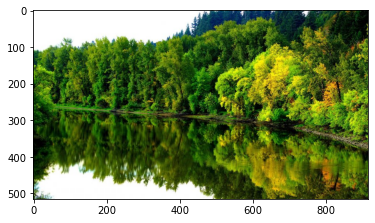

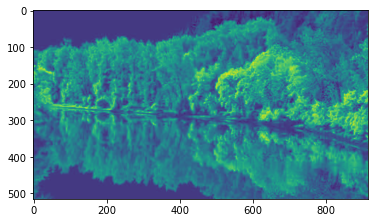

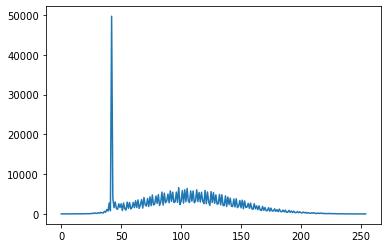

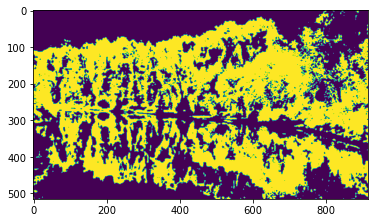

In [12]:
img = cv2.imread(r"C:\Users\asharma\Desktop\IMAGES\Tree.jpg")

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

source = np.array(img, dtype=np.float32) /255.0

(r,g,b) = cv2.split(source)

color_map = 2*g - b - r

plt.imshow(color_map)
plt.show()

(minv, maxv, minl, maxl) = cv2.minMaxLoc(color_map)

hist = cv2.calcHist([color_map],[0],None,[255],[minv,maxv])

plt.plot(hist)
plt.show()


color_map_img = np.array((color_map - minv) / (maxv - minv) * 255, dtype=np.uint8)

(thres, treated_img) = cv2.threshold(color_map_img, -1.0, 255, cv2.THRESH_OTSU)

plt.imshow(treated_img)
plt.show()

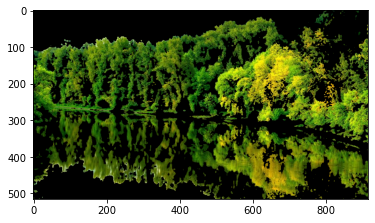

In [13]:
(r,g,b) = cv2.split(img)
final_image = cv2.merge([r & treated_img, g & treated_img, b & treated_img])

plt.imshow(final_image)
plt.show()